In [27]:
import numpy as np
import matplotlib.pyplot as plt
import random

Initializing data __D1__ and __D2__ where __D1__ is created with the simple boundary of __*x = y*__ and __D2__ is created with respect to the boundary of __*x^2 = y*__

In [28]:
# D1 - x = y

xA = np.random.uniform(-1, 1, 100).reshape(100,1)
yA = np.zeros(100).reshape(100,1)
for i in range(100):
    yA[i] = random.uniform(xA[i], 1) + 0.1

xB = np.random.uniform(-1, 1, 100).reshape(100,1)
yB = np.zeros(100).reshape(100,1)
for i in range(100):
    yB[i] = random.uniform(-1, xB[i]) - 0.1

D1_data = np.concatenate( (np.vstack((xA, xB)), np.vstack((yA, yB))), axis=1)
D1_labels = np.vstack((np.ones((100,1)), np.zeros((100,1))))

# D2 - x^2 = y

xA = np.random.uniform(-1, 1, 100).reshape(100,1)
yA = np.zeros(100).reshape(100,1)
for i in range(100):
    yA[i] = random.uniform(xA[i]**2, 1) + 0.1

xB = np.random.uniform(-1, 1, 100).reshape(100,1)
yB = np.zeros(100).reshape(100,1)
for i in range(100):
    yB[i] = random.uniform(-0.2, xB[i]**2) - 0.1

D2_data = np.concatenate( (np.vstack((xA, xB)), np.vstack((yA, yB))), axis=1)
D2_labels = np.vstack((np.ones((100,1)), np.zeros((100,1))))

Plotting the data samples with the chosen decision boundary

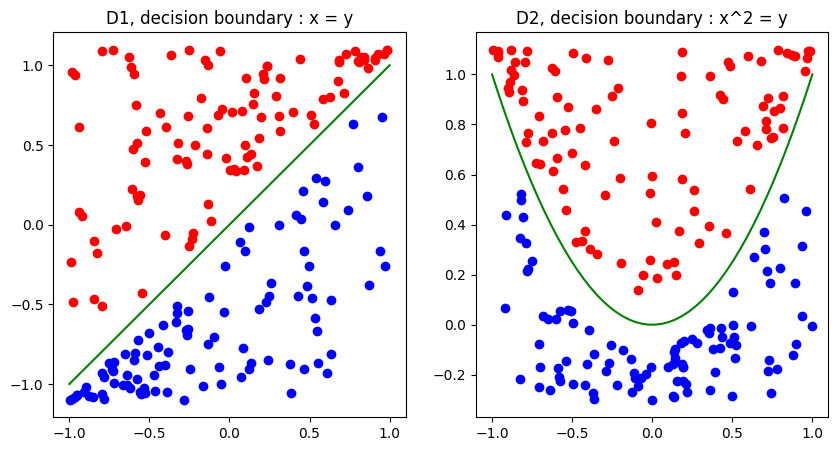

In [47]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.scatter(D1_data[:100,0], D1_data[:100,1], color='red', marker='o')
ax1.scatter(D1_data[100:,0], D1_data[100:,1], color='blue', marker='o')
ax1.plot([-1,1], [-1,1], color='green')
ax1.set_title('D1, decision boundary : x = y')

dec_bound_x = np.linspace(-1, 1, 50)
dec_bound_y = np.square(dec_bound_x)

ax2.scatter(D2_data[:100,0], D2_data[:100,1], color='red', marker='o')
ax2.scatter(D2_data[100:,0], D2_data[100:,1], color='blue', marker='o')
ax2.plot(dec_bound_x, dec_bound_y, color='green')
ax2.set_title('D2, decision boundary : x^2 = y')

plt.show()

Initializing the SVM models

In [31]:
from sklearn.svm import SVC

hard_margin_svm = SVC(kernel='linear', C=float(99999999))
soft_margin_svm = SVC(kernel='poly', degree=2, C=1.0)

Splitting the data into train and test sets and also preserving the label ratios

In [39]:
from sklearn.model_selection import train_test_split

D1_X_train, D1_X_test, D1_y_train, D1_y_test = train_test_split(D1_data, D1_labels, test_size=0.1, stratify=D1_labels)
D2_X_train, D2_X_test, D2_y_train, D2_y_test = train_test_split(D2_data, D2_labels, test_size=0.1, stratify=D2_labels)

# (D1_y_train, D1_y_test) = T1
# (D2_y_train, D2_y_test) = T2

Training the SVM models

In [42]:
hard_margin_svm.fit(D1_X_train, D1_y_train)
soft_margin_svm.fit(D2_X_train, D2_y_train)

c:\Users\Enis\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Enis\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(degree=2, kernel='poly')

Prediction results for both models by the accuracy metric

In [45]:
print('Accuracy for hard margin SVM model :', '{}%'.format(hard_margin_svm.score(D1_X_test, D1_y_test)*100))
print('Accuracy for soft margin SVM model :', '{}%'.format(soft_margin_svm.score(D2_X_test, D2_y_test)*100))

Accuracy for hard margin SVM model : 100.0%
Accuracy for soft margin SVM model : 85.0%


Implementing a Multi-Layer Perceptron and performing the tests on __D2__

In [48]:
from sklearn.neural_network import MLPClassifier

mlp_model_D1 = MLPClassifier(hidden_layer_sizes=(4,), max_iter=100, learning_rate_init=0.1)
mlp_model_D2 = MLPClassifier(hidden_layer_sizes=(4,), max_iter=100, learning_rate_init=0.1)
mlp_model_D1.fit(D1_X_train, D1_y_train)
mlp_model_D2.fit(D2_X_train, D2_y_train)

print('Accuracy for MLP model on D1:', '{}%'.format(mlp_model_D1.score(D1_X_test, D1_y_test)*100))
print('Accuracy for MLP model on D2:', '{}%'.format(mlp_model_D2.score(D2_X_test, D2_y_test)*100))

Accuracy for MLP model on D1: 100.0%
Accuracy for MLP model on D2: 95.0%


c:\Users\Enis\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1101: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Enis\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1101: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


As it is observed from these tests it is seen that the MLP model surpasses the performance of the soft-margin SVM model by *10%*, 
but as the SVM already succesfully predicted every test sample correct, at this scale and on data D1 both achieve perfect accuracy.